In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_to_index = {
    'bloomz-560m': 0,
    'bloomz-1b1': 1,
    'bloomz-1b7': 2,
    'bloomz-3b': 3,
    'bloomz-7b1': 4,
    'mt0-small': 5,
    'mt0-base': 6,
    'mt0-large': 7,
    'mt0-xl': 8,
    'mt0-xxl': 9,
    'bactrian-x-bloom-7b1-lora': 10,
    'bactrian-id-bloom-7b1-lora': 11,
    'Llama-2-7b-chat-hf': 12,
    'Llama-2-13b-chat-hf': 13, 
    'sealion7b-instruct-nc': 14, 
    'SeaLLM-7B-Chat': 15,
    'Merak-7B-v4': 16,
    'cendol-mt5-small': 20,
    'cendol-mt5-base': 21,
    'cendol-mt5-large': 22,
    'cendol-mt5-xl': 23,
    'cendol-mt5-xxl-merged': 24,
    'cendol-llama2-7b': 25,
    'cendol-llama2-13b-merged': 26,
    'cendol-mt5-small-chat': 27,
    'cendol-mt5-base-chat': 28,
    'cendol-mt5-large-chat': 29,
    'cendol-mt5-xl-chat': 30,
    'cendol-mt5-xxl-merged-chat': 31,
    'cendol-llama2-7b-chat': 32,
    'cendol-llama2-13b-merged-chat': 33
}

model_to_display_name = {
    'bloomz-560m': 'BLOOMZ\n560M',
    'bloomz-1b1': 'BLOOMZ\n1.1B',
    'bloomz-1b7': 'BLOOMZ\n1.7B',
    'bloomz-3b': 'BLOOMZ\n3B',
    'bloomz-7b1': 'BLOOMZ\n7.1B',
    'mt0-small': 'mT0\nSmall',
    'mt0-base': 'mT0\nBase',
    'mt0-large': 'mT0\nLarge',
    'mt0-xl': 'mT0\nXL',
    'mt0-xxl': 'mT0\nXXL',
    'bactrian-x-bloom-7b1-lora': 'Bactrian-X',
    'bactrian-id-bloom-7b1-lora': 'Bactrian-Id',
    'Llama-2-7b-chat-hf': 'LLaMA2\n7B Chat', 
    'Llama-2-13b-chat-hf': 'LLaMA2\n13B Chat', 
    'sealion7b-instruct-nc': 'SEALION\n7B Instruct', 
    'SeaLLM-7B-Chat': 'SeaLLM\n7B Chat',
    'Merak-7B-v4': 'Merak\n7B v4',
    'cendol-mt5-small': 'Cendol\nmT5 Small',
    'cendol-mt5-base': 'Cendol\nmT5 Base',
    'cendol-mt5-large': 'Cendol\nmT5 Large',
    'cendol-mt5-xl': 'Cendol\nmT5 XL',
    'cendol-mt5-xxl-merged': 'Cendol\nmT5 XXL',
    'cendol-llama2-7b': 'Cendol\nLLaMA2 7B',
    'cendol-llama2-13b-merged': 'Cendol\nLLaMA2 13B',
    'cendol-mt5-small-chat': 'Cendol mT5\nSmall Chat',
    'cendol-mt5-base-chat': 'Cendol mT5\nBase Chat',
    'cendol-mt5-large-chat': 'Cendol mT5\nLarge Chat',
    'cendol-mt5-xl-chat': 'Cendol mT5\nXL Chat',
    'cendol-mt5-xxl-merged-chat': 'Cendol mT5\nXXL Chat',
    'cendol-llama2-7b-chat': 'Cendol LLaMA2\n7B Chat',
    'cendol-llama2-13b-merged-chat':'Cendol LLaMA2\n13B Chat'
}

model_to_color = {
    'bloomz-560m': 'gray',
    'bloomz-1b1': 'gray',
    'bloomz-1b7': 'gray',
    'bloomz-3b': 'gray',
    'bloomz-7b1': 'gray',
    'mt0-small': 'g',
    'mt0-base': 'g',
    'mt0-large': 'g',
    'mt0-xl': 'g',
    'mt0-xxl': 'g',
    'bactrian-x-bloom-7b1-lora': 'b',
    'bactrian-id-bloom-7b1-lora': 'b',
    'Llama-2-13b-chat-hf': 'purple', 
    'Llama-2-7b-chat-hf': 'purple', 
    'sealion7b-instruct-nc': 'orange',
    'SeaLLM-7B-Chat': 'orange',
    'Merak-7B-v4': 'yellow',
    'cendol-mt5-small': 'r',
    'cendol-mt5-base': 'r',
    'cendol-mt5-large': 'r',
    'cendol-mt5-xl': 'r',
    'cendol-mt5-xxl-merged': 'r',
    'cendol-llama2-7b': 'pink',
    'cendol-llama2-13b-merged': 'pink',
    'cendol-mt5-small-chat': 'r',
    'cendol-mt5-base-chat': 'r',
    'cendol-mt5-large-chat': 'r',
    'cendol-mt5-xl-chat': 'r',
    'cendol-mt5-xxl-merged-chat': 'r',
    'cendol-llama2-7b-chat': 'pink',
    'cendol-llama2-13b-merged-chat': 'pink'
}

In [3]:
dfs = []
for path in glob.glob('metrics_nlu_ext/*'):
    model = path.split('ext_nlu_results_')[-1][:-4].split('_')[-1]
    if model == 'sealion7b':
        continue
    df = pd.read_csv(path)
    df['model'] = model
    dfs.append(df)
df = pd.concat(dfs)
df['model_id'] = df['model'].apply(lambda x: model_to_index[x])
df['model_name'] = df['model'].apply(lambda x: model_to_display_name[x])

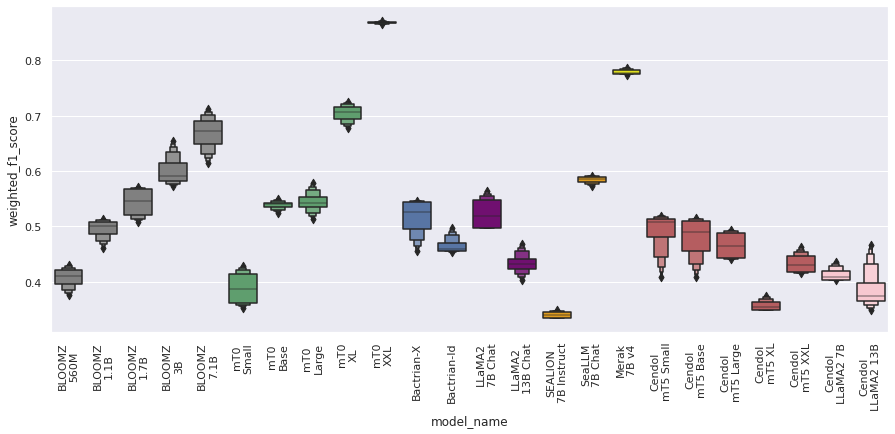

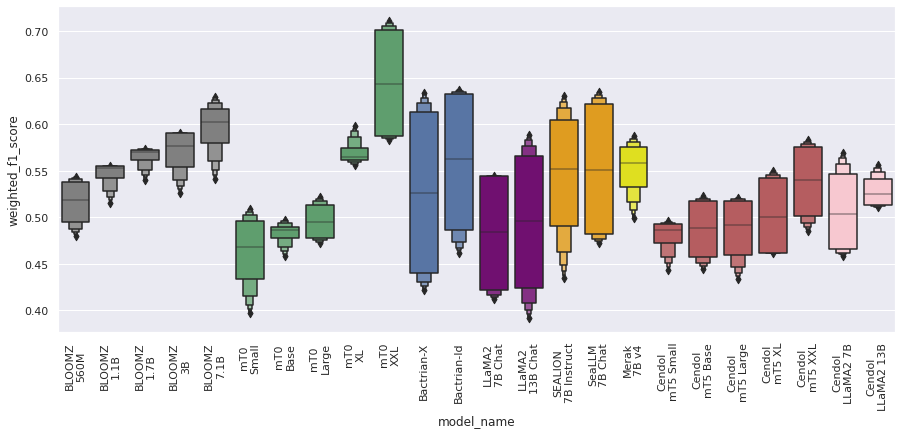

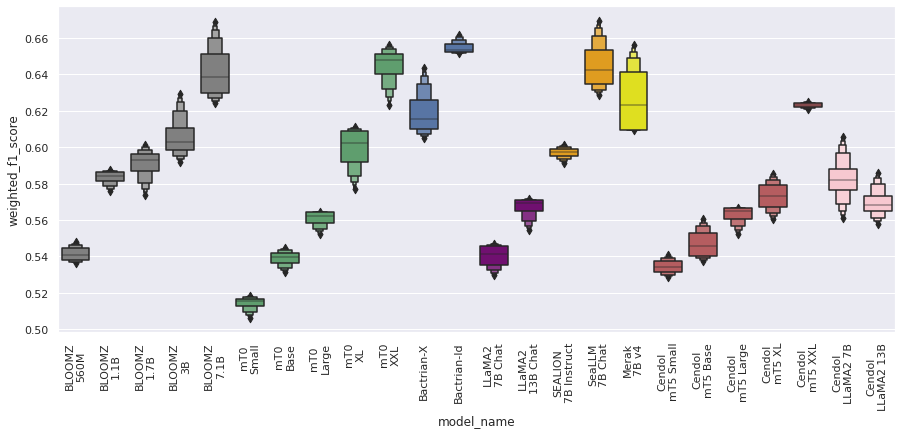

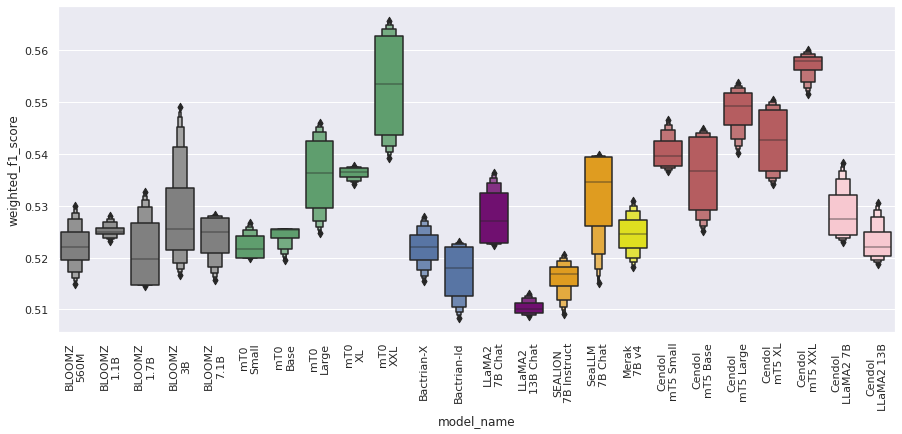

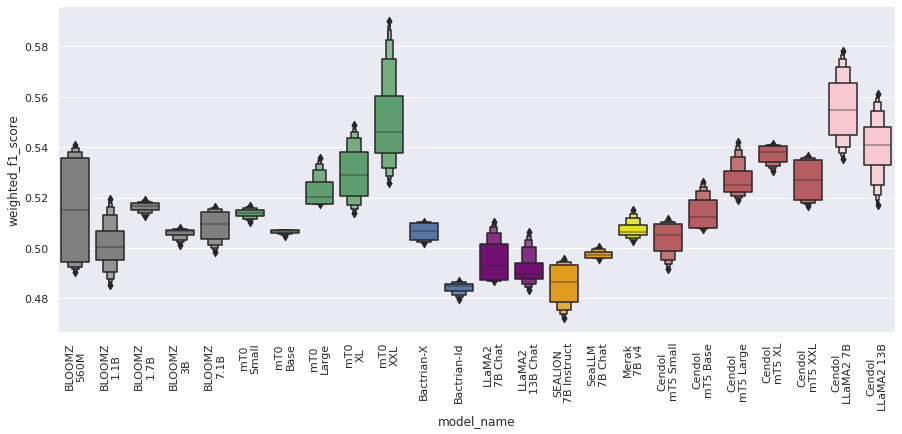

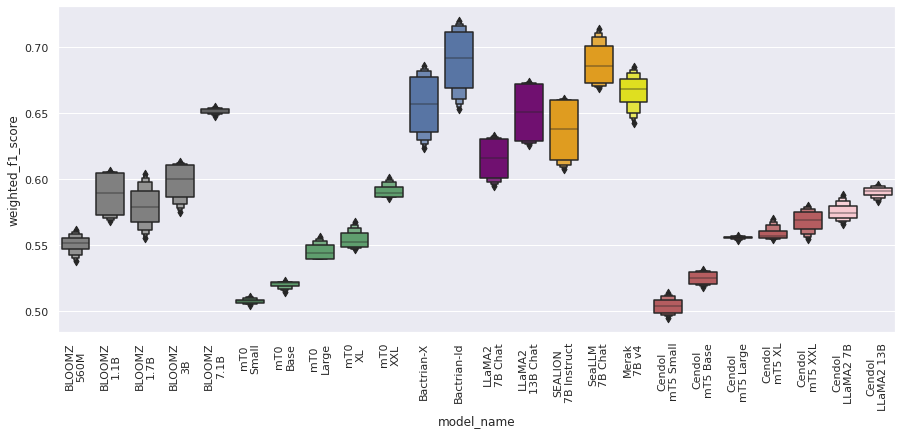

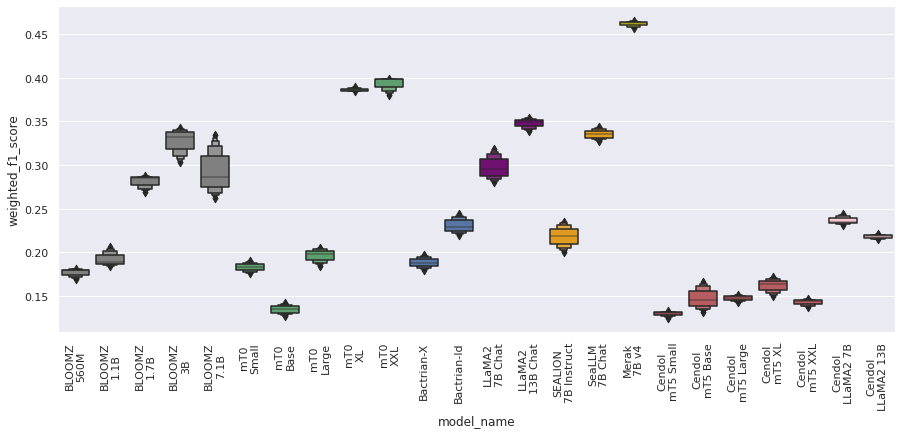

In [ ]:
# Ind
sns.set(rc={'figure.figsize':(15,6)})
for dataset in df['dataset'].unique():
    pdf = df[(~df['model'].str.contains('chat')) | (~df['model'].str.contains('cendol'))]
    sns.boxenplot(
        data=pdf.loc[(pdf['prompt_lang'] == 'ind') & (pdf['dataset'] == dataset),:].sort_values('model_id').reset_index(drop=True),
        x='model_name', y='weighted_f1_score', k_depth=7, dodge=True, palette=model_to_color.values()
    )
    plt.xticks(rotation=90)
    plt.show()

MAPS


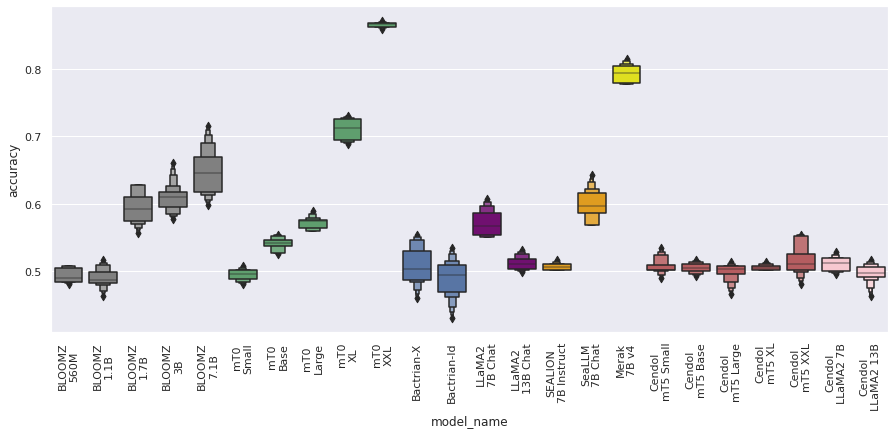

haryoaw/COPAL


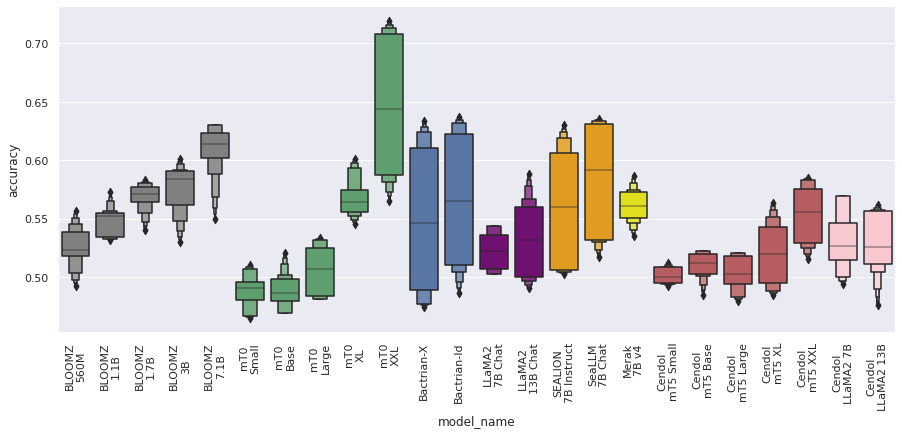

MABL/id


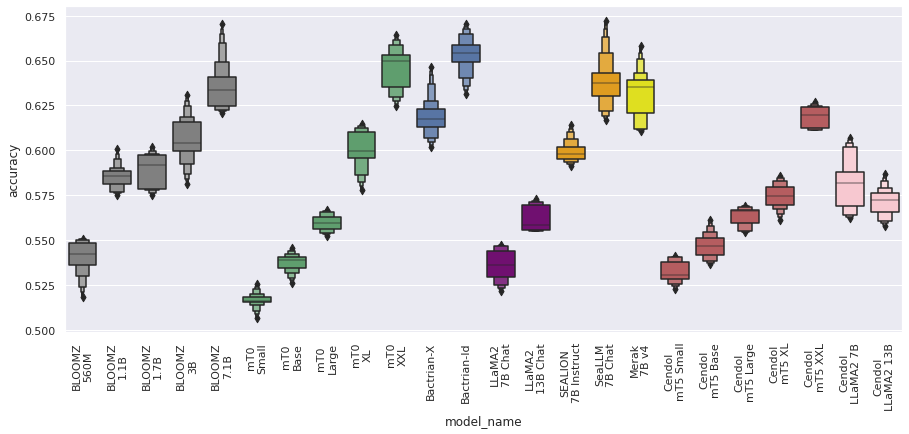

MABL/jv


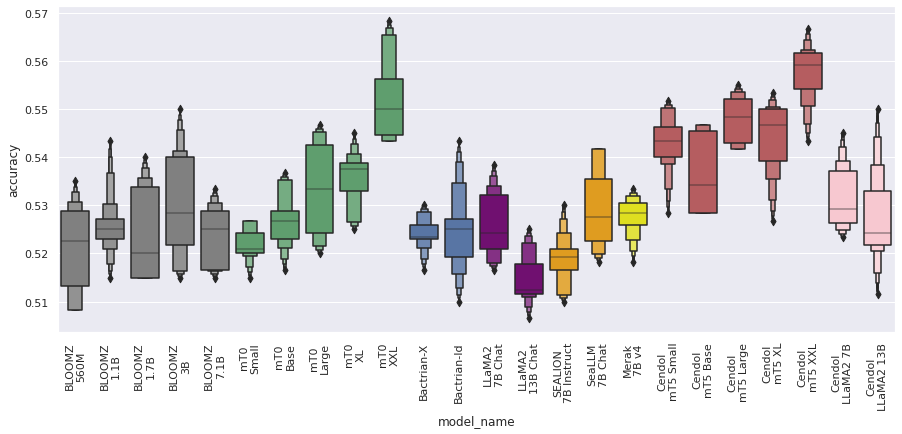

MABL/su


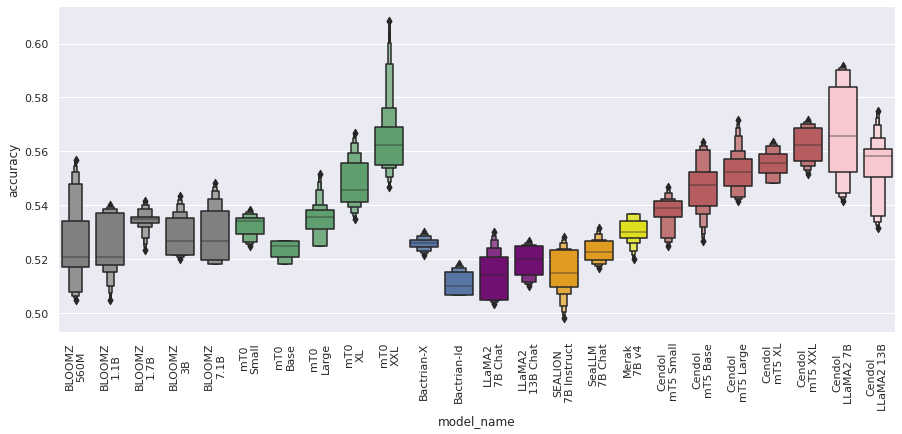

IndoStoryCloze


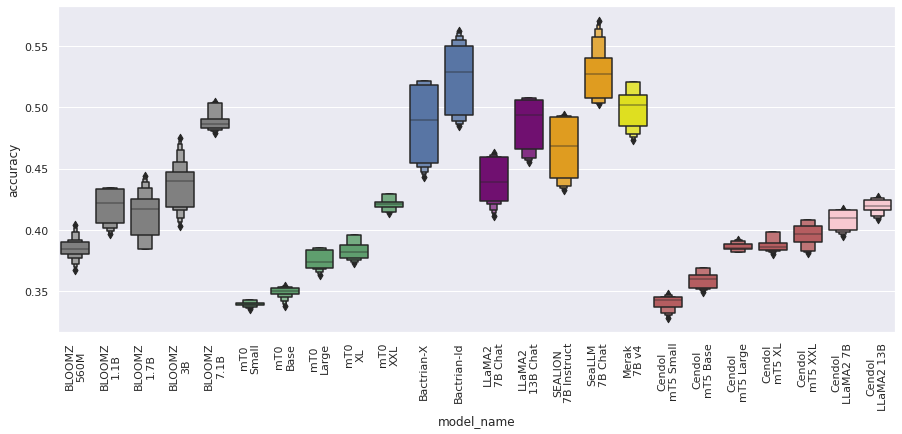

IndoMMLU


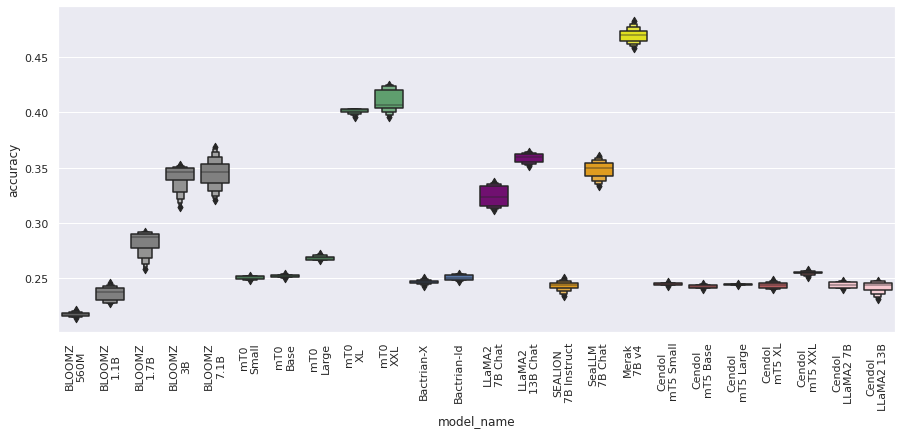

In [71]:
# Mix
sns.set(rc={'figure.figsize':(15,6)})
for dataset in df['dataset'].unique():
    print(dataset)
    pdf = df[(~df['model'].str.contains('chat')) | (~df['model'].str.contains('cendol'))]
    sns.boxenplot(
        data=pdf.loc[(pdf['dataset'] == dataset),:].sort_values('model_id').reset_index(drop=True),
        x='model_name', y='accuracy', k_depth=7, dodge=True, palette=model_to_color.values()
    )
    plt.xticks(rotation=90)
    plt.show()

In [45]:
tdf = df[(~df['model'].str.contains('chat')) | (~df['model'].str.contains('cendol'))]
agg_df = tdf.groupby(['model_id', 'model_name', 'dataset', 'prompt_lang'])[['accuracy','macro_f1_score','weighted_f1_score']].median().reset_index()

In [46]:
agg_df

,model_id,model_name,dataset,prompt_lang,accuracy,macro_f1_score,weighted_f1_score
0,0,BLOOMZ\n560M,IndoMMLU,eng,0.217008,0.190659,0.176051
1,0,BLOOMZ\n560M,IndoMMLU,ind,0.218276,0.195652,0.179572
2,0,BLOOMZ\n560M,IndoStoryCloze,eng,0.388546,0.279821,0.559642
3,0,BLOOMZ\n560M,IndoStoryCloze,ind,0.380617,0.275685,0.551370
4,0,BLOOMZ\n560M,MABL/id,eng,0.539912,0.537712,0.537712
...,...,...,...,...,...,...,...
331,26,Cendol\nLLaMA2 13B,MABL/su,ind,0.557500,0.540775,0.540775
332,26,Cendol\nLLaMA2 13B,MAPS,eng,0.491202,0.464589,0.464594
333,26,Cendol\nLLaMA2 13B,MAPS,ind,0.502933,0.374010,0.373168
334,26,Cendol\nLLaMA2 13B,haryoaw/COPAL,eng,0.532200,0.531910,0.531929


In [80]:
pivot_df = agg_df[agg_df['prompt_lang'] == 'ind'].pivot(index=['model_id','model_name'], columns=['dataset'], values='weighted_f1_score')

In [93]:
pivot_df = pivot_df.loc[:,['MABL/id','MABL/jv','MABL/su']]

In [94]:
pivot_df.loc[:,'Avg.'] = pivot_df.mean(axis='columns')

In [95]:
print(pivot_df.to_latex())

\begin{tabular}{llrrrr}
\toprule
   & dataset &   MABL/id &   MABL/jv &   MABL/su &      Avg. \\
model\_id & model\_name &           &           &           &           \\
\midrule
0  & BLOOMZ\textbackslash n560M &  0.540960 &  0.522082 &  0.514966 &  0.526003 \\
1  & BLOOMZ\textbackslash n1.1B &  0.584394 &  0.524993 &  0.500538 &  0.536642 \\
2  & BLOOMZ\textbackslash n1.7B &  0.592934 &  0.519775 &  0.516613 &  0.543107 \\
3  & BLOOMZ\textbackslash n3B &  0.602616 &  0.525553 &  0.506599 &  0.544923 \\
4  & BLOOMZ\textbackslash n7.1B &  0.638298 &  0.525034 &  0.509625 &  0.557652 \\
5  & mT0\textbackslash nSmall &  0.515696 &  0.521632 &  0.513895 &  0.517075 \\
6  & mT0\textbackslash nBase &  0.539589 &  0.525311 &  0.506750 &  0.523883 \\
7  & mT0\textbackslash nLarge &  0.562385 &  0.536288 &  0.520278 &  0.539650 \\
8  & mT0\textbackslash nXL &  0.602333 &  0.536511 &  0.528791 &  0.555878 \\
9  & mT0\textbackslash nXXL &  0.647950 &  0.553440 &  0.545893 &  0.582428 \\
10 & Ba